In [1]:
import pandas as pd
import numpy as np

# Datos ficticios de ventas
data_ventas_advanced = {
    'Fecha': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', 
              '2023-01-06', '2023-01-07', '2023-02-01', '2023-02-02', '2023-02-03'],
    'Cliente': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Edad': [23, 45, 35, 28, 40, 50, 33, 24, 36, 29],
    'Género': ['F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M'],
    'Canal': ['Online', 'Offline', 'Online', 'Offline', 'Online', 'Offline', 'Online', 'Offline', 'Online', 'Offline'],
    'Producto': ['Camiseta', 'Zapatos', 'Pantalón', 'Camiseta', 'Zapatos', 
                 'Camiseta', 'Pantalón', 'Camiseta', 'Zapatos', 'Pantalón'],
    'Categoría': ['Ropa', 'Calzado', 'Ropa', 'Ropa', 'Calzado', 
                   'Ropa', 'Pantalón', 'Ropa', 'Zapatos', 'Ropa'],
    'Cantidad': [1, 2, 1, 3, 1, 2, 1, 2, 3, 1],
    'Precio': [25, 50, 75, 25, 50, 75, 25, 50, 75, 25],
    'Ventas Totales': [25, 100, 75, 75, 50, 150, 100, 50, 150, 75],
    'Región': ['Norte', 'Sur', 'Este', 'Oeste', 'Norte', 'Sur', 'Este', 'Oeste', 'Norte', 'Sur']
}

# Crear el DataFrame
df_advanced = pd.DataFrame(data_ventas_advanced)

df_advanced

,Fecha,Cliente,Edad,Género,Canal,Producto,Categoría,Cantidad,Precio,Ventas Totales,Región
0,2023-01-01,A,23,F,Online,Camiseta,Ropa,1,25,25,Norte
1,2023-01-02,B,45,M,Offline,Zapatos,Calzado,2,50,100,Sur
2,2023-01-03,C,35,M,Online,Pantalón,Ropa,1,75,75,Este
3,2023-01-04,D,28,F,Offline,Camiseta,Ropa,3,25,75,Oeste
4,2023-01-05,E,40,M,Online,Zapatos,Calzado,1,50,50,Norte
5,2023-01-06,F,50,F,Offline,Camiseta,Ropa,2,75,150,Sur
6,2023-01-07,G,33,M,Online,Pantalón,Pantalón,1,25,100,Este
7,2023-02-01,H,24,F,Offline,Camiseta,Ropa,2,50,50,Oeste
8,2023-02-02,I,36,F,Online,Zapatos,Zapatos,3,75,150,Norte
9,2023-02-03,J,29,M,Offline,Pantalón,Ropa,1,25,75,Sur


In [2]:
df_advanced = df_advanced.dropna()
df_advanced['Producto'] = df_advanced['Producto'].str.strip()
df_advanced['Categoría'] = df_advanced['Categoría'].str.strip()
df_advanced = df_advanced.drop_duplicates()
df_advanced['Categoría'] = df_advanced['Categoría'].replace('Zapatos', 'Calzado')

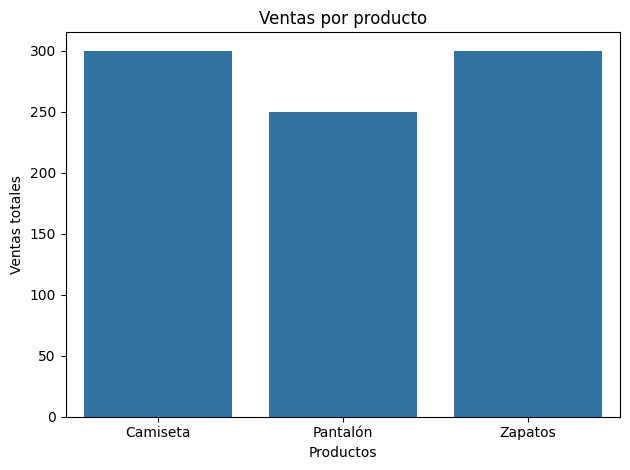

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

ventas_por_producto = df_advanced.groupby('Producto')['Ventas Totales'].agg('sum').reset_index()

sns.barplot(
    data=ventas_por_producto,
    x='Producto',
    y='Ventas Totales',
)

plt.title('Ventas por producto')
plt.xlabel('Productos')
plt.ylabel('Ventas totales')
plt.tight_layout()
plt.show()

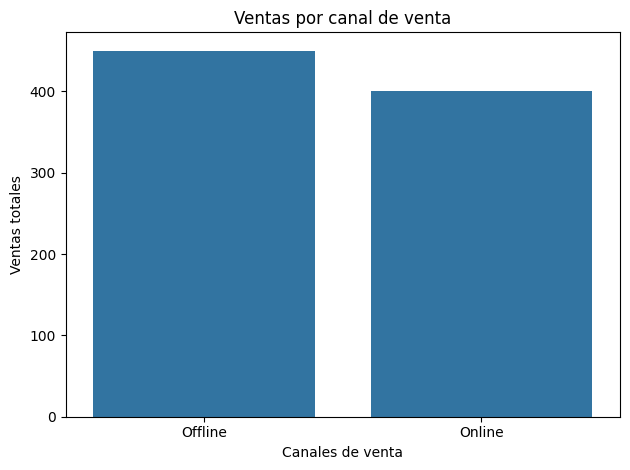

In [8]:
ventas_por_canal = df_advanced.groupby('Canal')['Ventas Totales'].agg('sum').reset_index()

sns.barplot(
    data=ventas_por_canal,
    x='Canal',
    y='Ventas Totales',
)

plt.title('Ventas por canal de venta')
plt.xlabel('Canales de venta')
plt.ylabel('Ventas totales')
plt.tight_layout()
plt.show()